<a href="https://colab.research.google.com/github/Ojz31/Stock-price-predication/blob/main/Stock_price_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

In [2]:
df = pd.read_csv('/content/NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [4]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [5]:
df[['year', 'month', 'day']] = df['Date'].apply(lambda x: pd.Series(map(int, x.split('-'))))
df.drop('Date',axis=1,inplace=True)

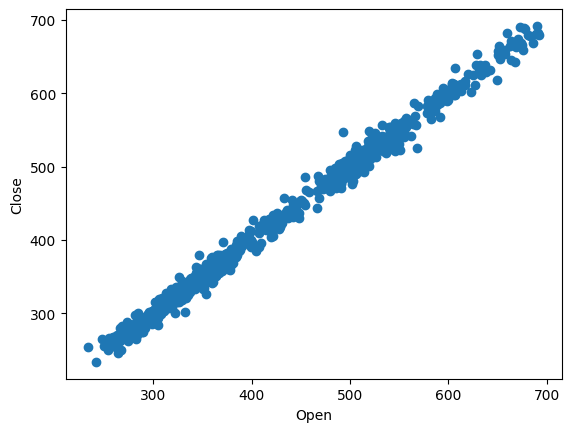

In [6]:
plt.scatter(df['Open'],df['Close'])
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

<Axes: >

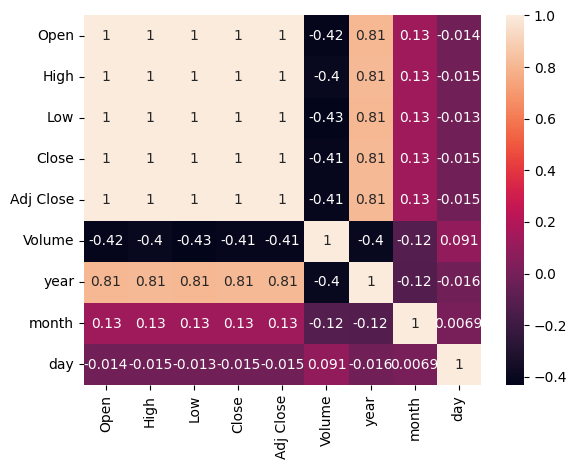

In [7]:
corr = df.corr()
sns.heatmap(corr,annot=True)

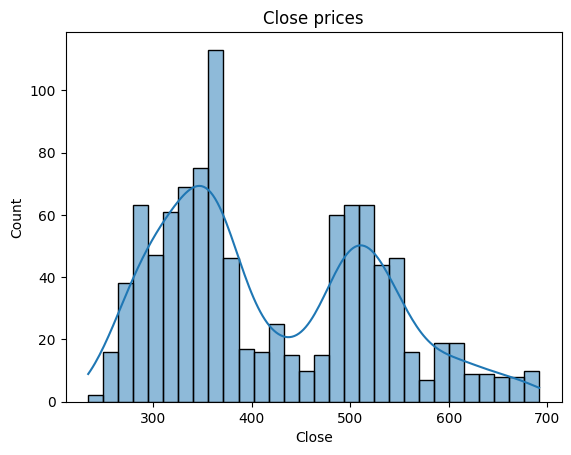

In [8]:
sns.histplot(df['Close'],kde=True,bins =30)
plt.title("Close prices")
plt.xlabel("Close")
plt.show()

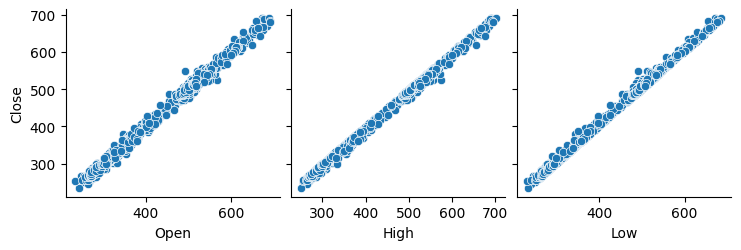

In [9]:
sns.pairplot(df, y_vars=['Close'], x_vars=['Open', 'High', 'Low'])

In [10]:
X = df.drop('Close',axis=1)
y = df['Close']

In [11]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
pred = linear_reg.predict(X_test)
mse = mean_squared_error(y_test,pred)
r2 = r2_score(y_test,pred)

print(f"Linear reg MSE: {mse}  R2 score {r2}")

Linear reg MSE: 4.574830893992998e-26  R2 score 1.0


In [13]:
random_for = RandomForestRegressor(n_estimators=100)
random_for.fit(X_train,y_train)
pred = random_for.predict(X_test)
mse = mean_squared_error(y_test,pred)
r2 = r2_score(y_test,pred)

print(f"Random forest MSE: {mse} R2: {r2}")

Random forest MSE: 0.8975453780933361 R2: 0.999923023940241


In [14]:
scaler = StandardScaler()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
 6   year       1009 non-null   int64  
 7   month      1009 non-null   int64  
 8   day        1009 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 71.1 KB


In [16]:
normalized_data = df.copy()
exclude_columns = ['year', 'month','day']
columns_to_normalize = [col for col in normalized_data.columns if col not in exclude_columns]
normalized_data[columns_to_normalize] = scaler.fit_transform(normalized_data[columns_to_normalize])

In [17]:
normalized_data.head()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,-1.447772,-1.441465,-1.510141,-1.522047,-1.522047,0.791791,2018,2,5
1,-1.579589,-1.452453,-1.556931,-1.416167,-1.416167,0.919875,2018,2,6
2,-1.405553,-1.399802,-1.377121,-1.426885,-1.426885,0.258257,2018,2,7
3,-1.400944,-1.444029,-1.510420,-1.560481,-1.560481,0.317787,2018,2,8
4,-1.522898,-1.552262,-1.639627,-1.566302,-1.566302,1.709045,2018,2,9


In [18]:
X = normalized_data.drop('Close',axis=1)
y = normalized_data['Close']

In [19]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
pred = linear_reg.predict(X_test)
mse = mean_squared_error(y_test,pred)
r2 = r2_score(y_test,pred)

print(f"Linear regression MSE: {mse} R2: {r2}")

Linear regression MSE: 3.660159186259859e-30 R2: 1.0


In [21]:
random_for = RandomForestRegressor(n_estimators=100)
random_for.fit(X_train,y_train)
pred = random_for.predict(X_test)
mse = mean_squared_error(y_test,pred)
r2 = r2_score(y_test,pred)

print(f"Random forest MSE: {mse} R2: {r2}")

Random forest MSE: 7.775176872195582e-05 R2: 0.9999218811929498


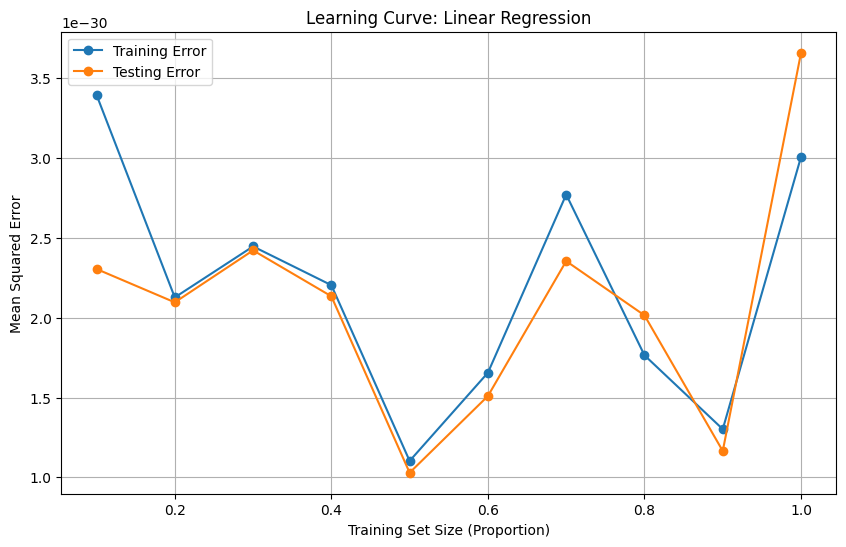

In [22]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores = []
    test_scores = []

    for train_size in train_sizes:

        subset_size = int(train_size * len(X_train))
        X_train_subset, y_train_subset = X_train[:subset_size], y_train[:subset_size]


        model.fit(X_train_subset, y_train_subset)


        train_pred = model.predict(X_train_subset)
        test_pred = model.predict(X_test)
        train_scores.append(mean_squared_error(y_train_subset, train_pred))
        test_scores.append(mean_squared_error(y_test, test_pred))


    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores, label="Training Error", marker='o')
    plt.plot(train_sizes, test_scores, label="Testing Error", marker='o')
    plt.title("Learning Curve: Linear Regression")
    plt.xlabel("Training Set Size (Proportion)")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.grid()
    plt.show()

linear_reg = LinearRegression()
plot_learning_curve(linear_reg, X_train, y_train, X_test, y_test)